In [1]:
from PIL import Image
import numpy as np

#### Get data from file

In [2]:
file_to_cut = "Pokedex.png"

my_img = Image.open(file_to_cut)

#### Format and get properties

In [3]:
Data = list(my_img.getdata())

cx, rx = my_img.size
print(rx, cx)

2188 2000


#### Human description

In [4]:
nc, nr = 25, 26 # number of pokemon per col/row
sc, sr = 80, 86 # larger of columns / rows

#### Formating

In [5]:
Formated_data = np.array(Data).reshape((rx,cx,4))

#### Test

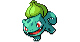

In [6]:
pixel_data = Formated_data[23 : 65, 0:sc]
Image.fromarray(np.uint8(pixel_data))

### Best for today, but some error for big pokemon

In [7]:
sc = 80
past = Formated_data[0,0:sc]

LST_pokemon = []

for cnt_j in range(nc) :
    cnt  =  0
    flag = -1
    lst  = []
    
    for i in range(rx):
        present = Formated_data[i, cnt_j*sc:(cnt_j+1)*sc]
        if (present == past).all() :
            if 10 >= i - flag:
                flag = i
            else :
                pixel_data = Formated_data[flag:i, cnt_j*sc:(cnt_j+1)*sc]
                pic = Image.fromarray(np.uint8(pixel_data))
                pic.save("Poke/col{}_{}.png".format(cnt+1, cnt_j+1))
                cnt += 1
                flag = i
                lst.append(pic)
                
    # save a column of pokemon together
    LST_pokemon.append(lst)
        

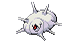

In [8]:
LST_pokemon[15][10]